# PROYECTO DE CONSOLIDACIÓN: APRENDIZAJE SUPERVISADO

## [EJERCICIO 1]
Bienvenido al año 2912, donde se necesitan tus habilidades de ciencia de datos para resolver un misterio cósmico. Hemos recibido una transmisión desde cuatro años luz de distancia y las cosas no pintan bien.

La nave espacial Alcón Milenario fue un transatlántico de pasajeros interestelar lanzado hace un mes. Con casi 13.000 pasajeros a bordo, la nave emprendió su viaje inaugural transportando emigrantes de nuestro sistema solar a tres exoplanetas recientemente habitables que orbitan estrellas cercanas.

Mientras rodeaba Alpha Centauri en ruta hacia su primer destino, el tórrido 55 Cancri E, la desprevenida nave espacial Alcón Milenario chocó con una anomalía del espacio-tiempo escondida dentro de una nube de polvo. Lamentablemente, tuvo un destino similar al de su homónimo de 1000 años antes. Aunque la nave permaneció intacta, ¡casi la mitad de los pasajeros fueron transportados a una dimensión alternativa!

Para ayudar a las tripulaciones de rescate y recuperar a los pasajeros perdidos, debe predecir qué pasajeros fueron transportados por la anomalía utilizando los registros recuperados del sistema informático dañado de la nave espacial.

¡Ayuda a salvarlos y cambia la historia!

#### a) Realiza un análisis exploratorio de los datos para entender la distribución de las diferentes variables.
#### b) Procesa los datos para:
##### - Detectar y tratar los posibles valores faltantes.
##### - Detectar y tratar outliers.
#### c) Utiliza las técnicas vistas en clase para detectar las variables más importante con respecto a la variable objetivo (Transported)
#### d) Aplica alguna de las técnicas vistas en clase para determinar qué pasajeros fueron transportados y cuales no.
#### e) Mejora los resultados optimizando los parámetros.
#### f) Compara los resultados obtenidos utilizando modelos de ensemble para resolver el problema.
#### g) Selecciona el mejor modelo de los testeados en los apartados anteriores.

##### Deberás entrenar y validar el modelo seleccionado sobre el dataset "spaceship_alcon_train.csv" y aplicar posteriormente este modelo para predecir sobre el dataset "spaceship_alcon_test.csv". -->ENTRENAR Y PROBAR CON EL PRIMERO. LUEGO TRATAR OS DATOS DEL SEGUNDO Y PREDECIR.
##### Deberás explicar todos los pasos que vayas dando en la resolución del problema.

In [994]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
import numpy as np
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [481]:
# A - 0.0 CARGA Y VISUALIZACION DE DATOS:

alcon = pd.read_csv("spaceship_alcon_train.csv")
alcon.head(25)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [483]:
# A - 0.1. DIMENSION DEL DS:

alcon.shape

(8693, 14)

In [485]:
# A - 0.2. VALORES NULOS POR COLUMNAS:

alcon.isna().sum()/len(alcon)*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [7]:
# A - 0.3. TIPOS DE VARIABLES:

alcon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [487]:
# A - 0.4. DESCRIPCION DE LAS VARIABLES NUMÉRICAS

alcon.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [489]:
# A - 0.5. FILAS NULAS:

alcon.iloc[:, 1:14].isnull().all(axis=1).any()
# No hay filas totalmente vacías (obviando PassengerId y Transported) que se puedan eliminar. Habría que tratar los nulos por columnas.

False

In [10]:
# A - 1. ANALISIS DE VARIABLES:

In [491]:
# A - 1.0 VARIABLE OBJETIVO Transported:

alcon.Transported.value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

<Axes: xlabel='Transported', ylabel='count'>

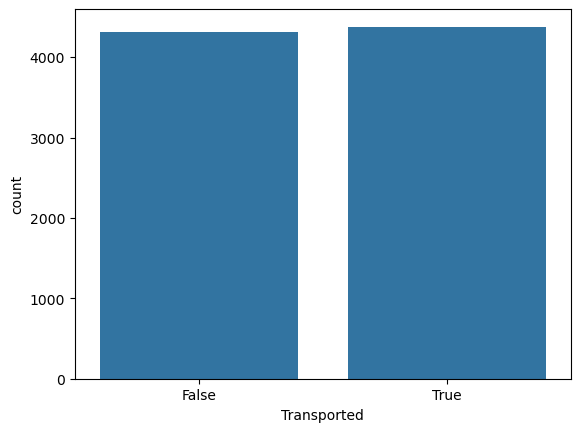

In [12]:
sns.barplot(alcon.Transported.value_counts())

# Se observan valores bastante similares:

In [493]:
# B - 1.1. HomePlanet:
# Revisamos sus distintos valores y la distribución:

alcon.HomePlanet.value_counts(dropna=False)/len(alcon)*100

HomePlanet
Earth     52.939146
Europa    24.513977
Mars      20.234672
NaN        2.312205
Name: count, dtype: float64

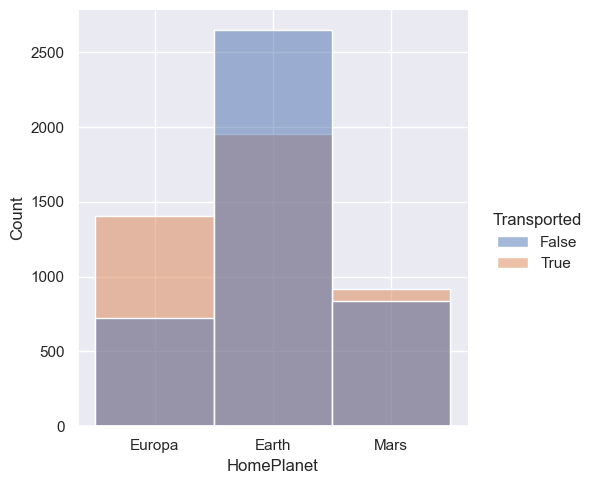

In [495]:
# Representación en barras contra la variable objetivo:

sns.displot(data=alcon, x='HomePlanet', hue="Transported", fill = "True")

# Parece haber un menor efecto con los terrícolas.

In [15]:
alcon_new = alcon.copy() # Para empezar a modificar sobre un nuevo DS

In [497]:
# HomePlanet: tratamiento NaN
# Probamos con ffill y revisamos si no varían mucho las proporciones.

alcon_new.HomePlanet = alcon_new.HomePlanet.fillna(method="ffill")

C:\Users\PC\AppData\Local\Temp\ipykernel_13292\3965097355.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  alcon_new.HomePlanet = alcon_new.HomePlanet.fillna(method="ffill")


In [499]:
alcon_new.HomePlanet.value_counts()/len(alcon)*100

# Vemos que el ffill no afecta mucho las proporciones entre variables tras aplicarlo

HomePlanet
Earth     54.296560
Europa    25.043138
Mars      20.660301
Name: count, dtype: float64

In [501]:
# B - 1.2. CryoSleep:

alcon.CryoSleep.value_counts()/len(alcon)*100

CryoSleep
False    62.567583
True     34.936156
Name: count, dtype: float64

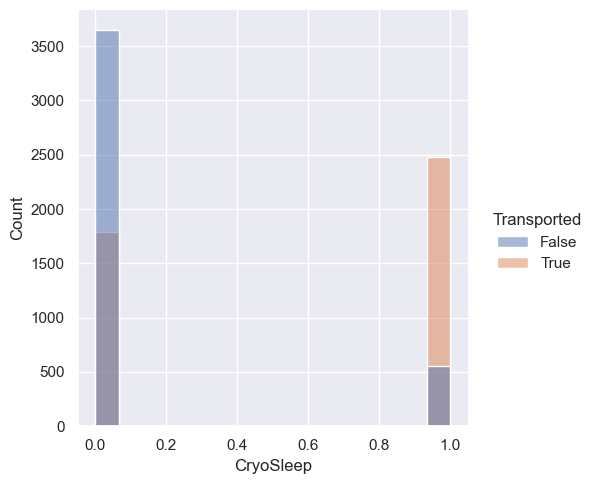

In [503]:
# Reprsentación en barras contra la variable objetivo:

sns.displot(data=alcon, x='CryoSleep', hue="Transported", fill = "True") # Altísima proporción de los pasajeros que usan camas de congelación.

In [505]:
# Como en la variable anterior, probamos esta vez con bfill y revisamos si no hay una alteración significatiba en las proporciones.

alcon_new.CryoSleep = alcon_new.CryoSleep.fillna(method="bfill")

C:\Users\PC\AppData\Local\Temp\ipykernel_13292\3177447572.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  alcon_new.CryoSleep = alcon_new.CryoSleep.fillna(method="bfill")


In [507]:
alcon_new.CryoSleep.value_counts()/len(alcon)*100 

# Podríamos mantener la imputación de NaN.

CryoSleep
False    64.063039
True     35.936961
Name: count, dtype: float64

In [22]:
# B - 1.3. Cabin:

# A simple vista, Cabin representaría un simple ID y sería descartable para el análisis,
# aunque muestra una relación de qué viajeros van acompañados o solos y no sabemos si sea un factor significativo.
# Intentaremos diferenciar lo anterior a partir de la variable PassengerId, pues los primeros cuetro caractéres se repiten en caso de ser pasajeros acompañados.


In [509]:
# Creamos la columna "Party" que muestra el tamaño del grupo familiar basado en el prefijo del PassengerId

id_counts = alcon_new['PassengerId'].str[:4].value_counts()
alcon_new["Party"] = alcon_new.PassengerId.str[:4].map(id_counts)

In [24]:
alcon_new.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Party
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1


In [511]:
# Añadimos la columna "Solo" para indicar si viaja solo o acompañado

alcon_new['Solo'] = np.where(alcon_new['Party'] == 1, 1, 0)

In [26]:
alcon_new.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Party,Solo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1


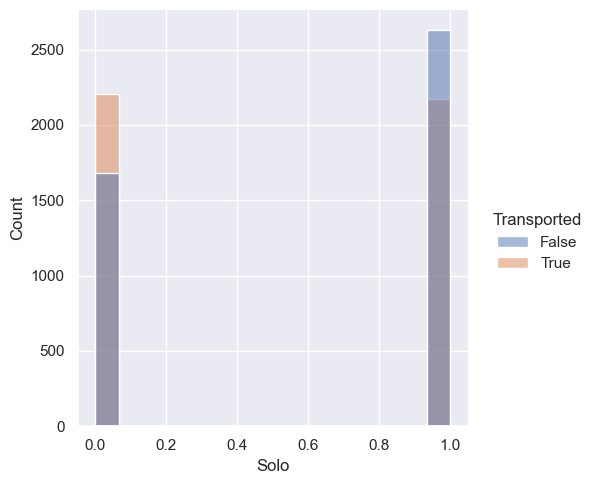

In [513]:
# Verificamos su incidencia con la variable objetivo, fueron transportados casi en igual proporción, no parece relevante esta variable

sns.displot(data=alcon_new, x='Solo', hue="Transported", fill = "True")

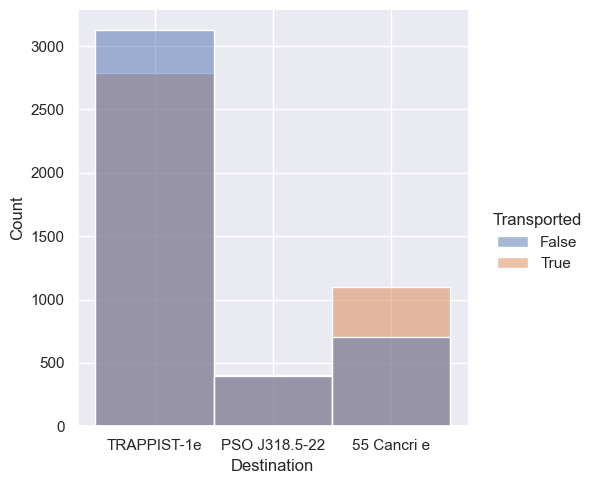

In [515]:
# B - 1.3. Destination:

sns.displot(data=alcon, x='Destination', hue="Transported", fill = "True")

# Entre los viajeros a 55 Cancri E, fueron más los transportados:

In [517]:
alcon_new.Destination = alcon_new.Destination.fillna("TRAPPIST-1e") #Rellenamos NaN con la moda.

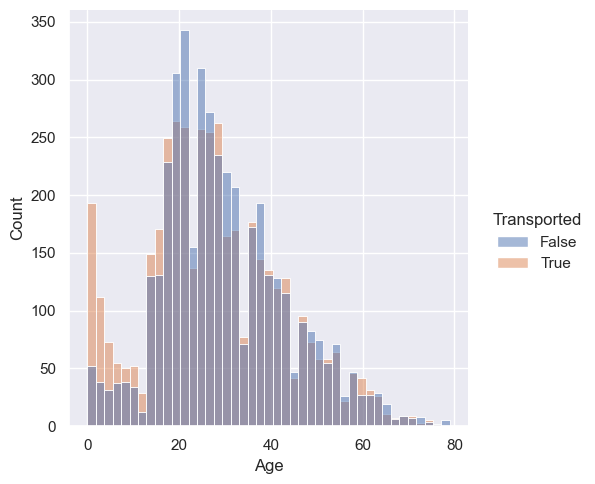

In [519]:
# B - 1.4. Age:

sns.displot(data=alcon, x='Age', hue="Transported", fill = "True")

# Es llamativo como los niños fueron transportados en gran proporción. Podría discretizarse Age entre niños y adultos, pues normalmente en los billetes también se hace esta distinción.

In [31]:
alcon_new.Age.median()

27.0

In [521]:
alcon_new.Age = alcon_new.Age.fillna(alcon_new.Age.median()) #Rellenamos edades con la mediana

In [523]:
# Definimos la variable "Kid" para indicar si es menor de 12 años

alcon_new['Kid'] = alcon_new['Age'].apply(lambda x: 1 if x < 12 else 0)

In [34]:
alcon_new.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Party,Solo,Kid
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,1,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1,0


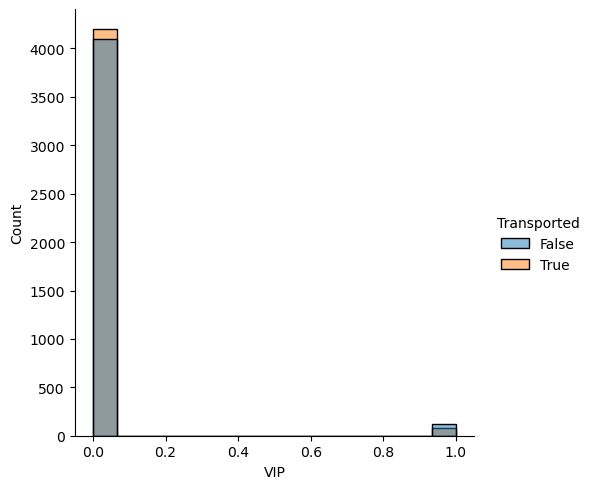

In [35]:
# B - 1.5. VIP:

sns.displot(data=alcon, x='VIP', hue="Transported", fill = "True")

#Vemos la variable VIP, la mayoría falsos y sin incidir en la variable objetivo. Podemos rellenar con false

In [525]:
alcon_new.VIP = alcon_new.VIP.fillna(False)

<Axes: xlabel='RoomService', ylabel='Count'>

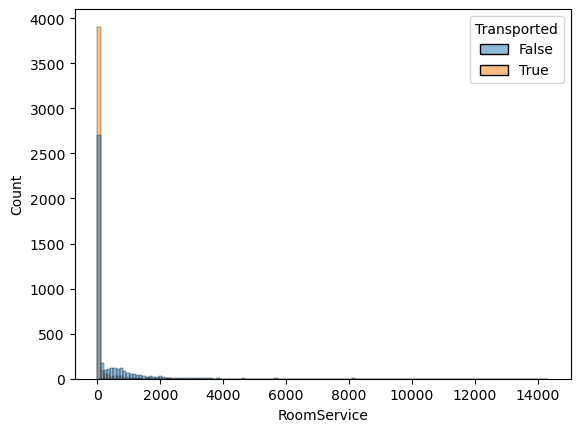

In [37]:
# B - 1.6. GASTOS: RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

sns.histplot(bins=140, data=alcon, x='RoomService', hue="Transported", fill = "True")

<Axes: xlabel='RoomService'>

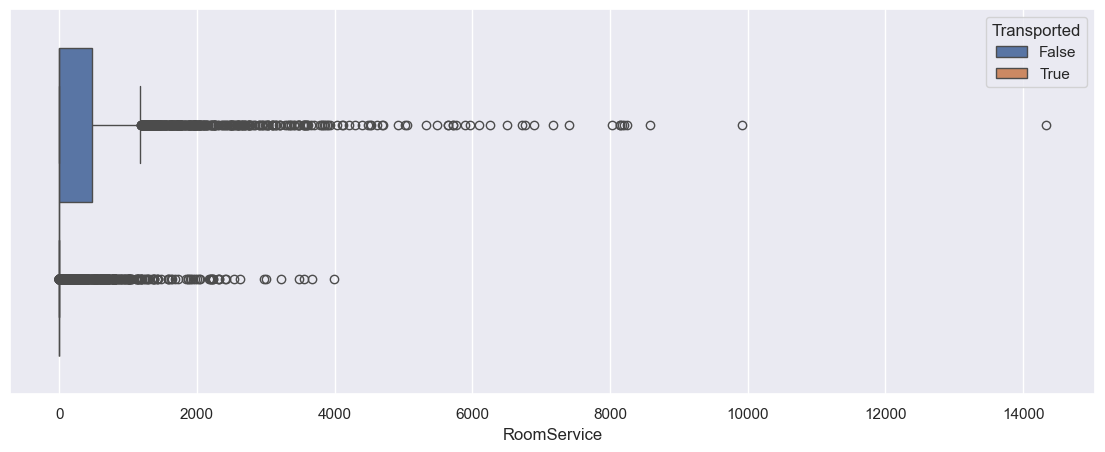

In [527]:
sns.boxplot(data=alcon, x='RoomService', hue="Transported", fill = "True")

<Axes: xlabel='FoodCourt', ylabel='Count'>

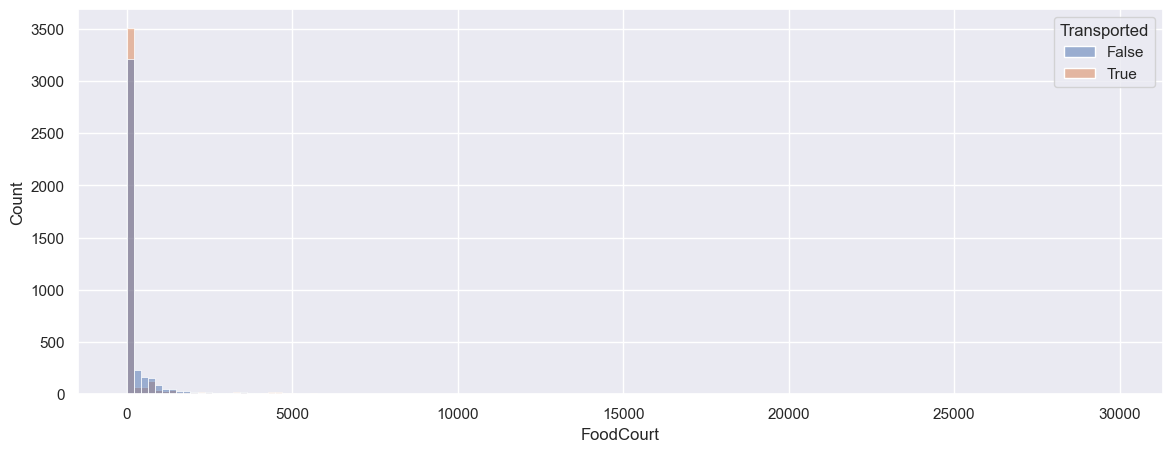

In [529]:
sns.histplot(bins=140, data=alcon, x='FoodCourt', hue="Transported", fill = "True")

<Axes: xlabel='Spa', ylabel='Count'>

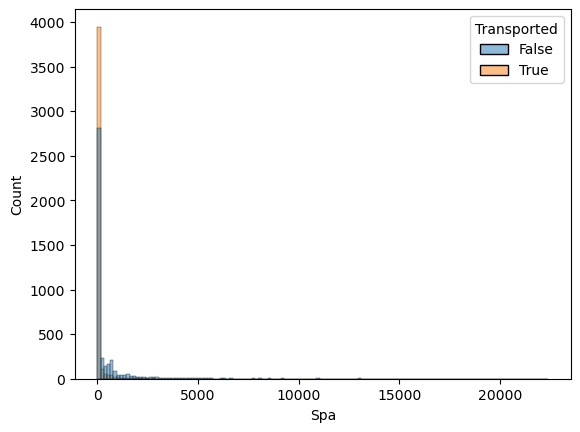

In [40]:
sns.histplot(bins=140, data=alcon, x='Spa', hue="Transported", fill = "True")

<Axes: xlabel='VRDeck', ylabel='Count'>

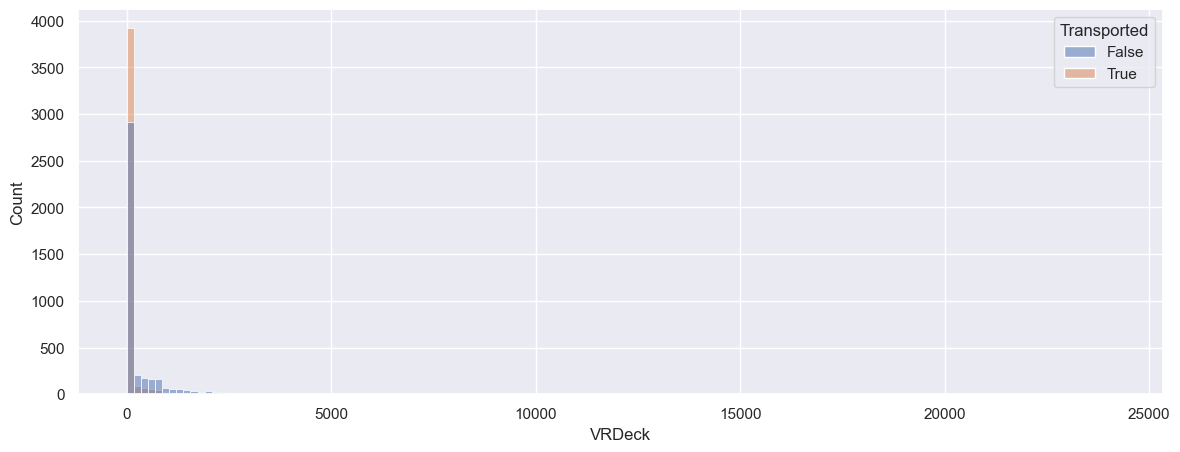

In [531]:
sns.histplot(bins=140, data=alcon, x='VRDeck', hue="Transported", fill = "True")

In [42]:
# Tras lo anterior deducimos que a mayor gasto generalizado, menos probabilidad de ser transportado.
# También destaca la presencia de outliers, pero intentaremos trabajar con las medianas para que no nos afecten tanto.

In [533]:
# Rellenamos los NaN de los gastos con las medianas:

alcon_new.RoomService = alcon_new.RoomService.fillna(alcon_new.RoomService.median())
alcon_new.FoodCourt = alcon_new.FoodCourt.fillna(alcon_new.FoodCourt.median())
alcon_new.ShoppingMall = alcon_new.ShoppingMall.fillna(alcon_new.ShoppingMall.median())
alcon_new.Spa = alcon_new.Spa.fillna(alcon_new.Spa.median())
alcon_new.VRDeck = alcon_new.VRDeck.fillna(alcon_new.VRDeck.median())

In [535]:
# Revisión de NaN:

alcon_new.isna().sum() #podemos descartar las columnas que no aportan (a priori): PassengerId, Cabin, Name, Party,

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Party             0
Solo              0
Kid               0
dtype: int64

In [537]:
# B - 1.7. Descartamos las variables redundantes o sin información predictiva (Ids, etc.)

alcon_clean = alcon_new.drop(["PassengerId", "Name", "Cabin", "Party"], axis=1)

In [46]:
alcon_clean.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Solo,Kid
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0


In [47]:
# C - 2.1. APLICAMOS ONE HOT ENCODING PARA LAS VARIABLES OBJECT

In [539]:
alcon_oh = pd.get_dummies(alcon_clean, columns=['HomePlanet','CryoSleep', 'Destination', 'VIP'], drop_first=True)

<Axes: >

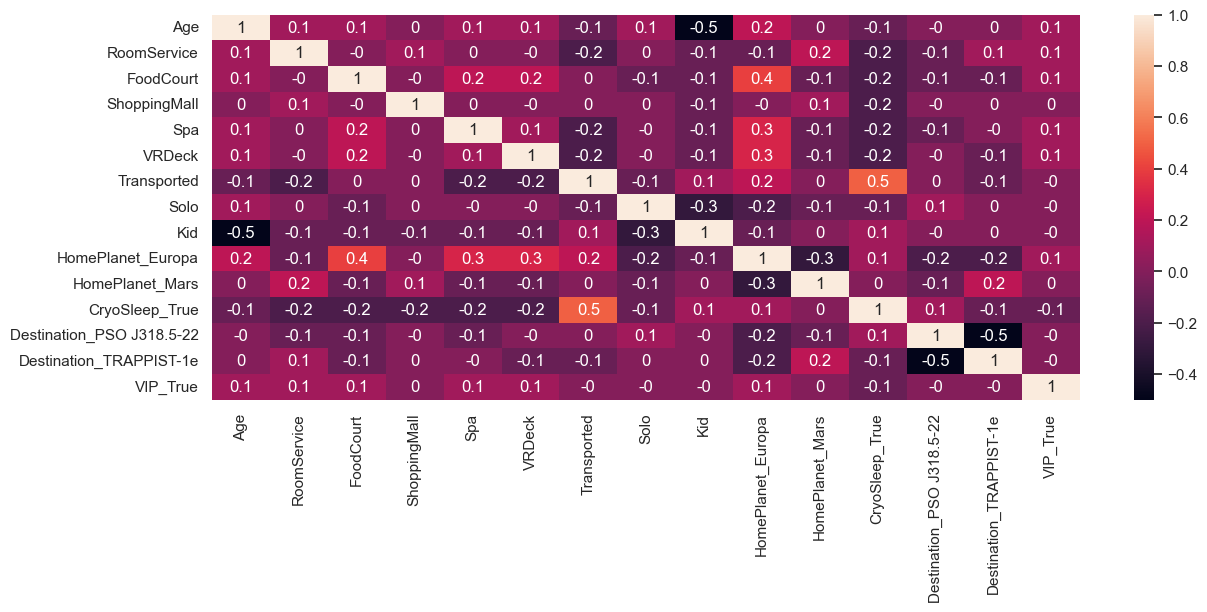

In [541]:
# C - 2.2. Visualizamos la correclación de las variables sobre un mapa de calor

cm = alcon_oh.corr().round(1)
sns.heatmap(data=cm, annot=True)

# Sobre la variable objetivo, Cryo_Sleep parece ser la más relacionada, posteriormente ser niño y  algunos tipos de gasto.
# No obstante mantenemso las variables para poder ver su capacidad predictiva más adelante cuando se apliquen los modelos de clasificación.

In [50]:
# D - APLICACION DE MODELOS DE CLASIFICACION SIMPLES

In [543]:
# D - 3.1. Generamos nuestras variables de input y objetivo:

X = alcon_oh.drop(["Transported"], axis=1)
y = alcon_oh.Transported

In [578]:
# D - 3.2. dividimos los datos en entrenamiento y prueba con una partición del 80%.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Tras un par de pruebas aleatorias, el random_state = 42 dio un poco de mejor accuracy sobre los modelos.

In [580]:
# D - 3.3. Escalado de variables con StandardScaler a espera de que no se afecte tanto por la presencia de outliers.

sc_x = StandardScaler()
X_train_sc = sc_x.fit_transform(X_train)
X_test_sc = sc_x.transform(X_test)

In [582]:
len(X_train_sc)

6954

In [584]:
len(X_test_sc)

1739

In [586]:
# D - 3.4. REGRESION LOGISTICA

from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(random_state = 42)

In [588]:
lrc.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

In [590]:
y_pred_test = lrc.predict(X_test_sc)

In [592]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

confusion_matrix(y_test, y_pred_test)

array([[647, 214],
       [183, 695]], dtype=int64)

In [594]:
accuracy_score(y_test, y_pred_test)

0.7717078780908568

In [596]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.78      0.75      0.77       861
        True       0.76      0.79      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



In [60]:
# D - 3.5. SVC

from sklearn.svm import SVC

svc = SVC(random_state = 42)
svc.fit(X_train_sc, y_train)

SVC(random_state=42)

In [61]:
y_pred_svc = svc.predict(X_test_sc)

In [62]:
accuracy_score(y_test, y_pred_svc)

0.7757009345794392

In [63]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

       False       0.77      0.78      0.78      3463
        True       0.78      0.77      0.78      3492

    accuracy                           0.78      6955
   macro avg       0.78      0.78      0.78      6955
weighted avg       0.78      0.78      0.78      6955



In [64]:
# D - 3.6. KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [65]:
y_pred_knn = knn.predict(X_test_sc)

In [66]:
accuracy_score(y_test, y_pred_knn)

0.7491013659237958

In [67]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

       False       0.76      0.72      0.74      3463
        True       0.74      0.78      0.76      3492

    accuracy                           0.75      6955
   macro avg       0.75      0.75      0.75      6955
weighted avg       0.75      0.75      0.75      6955



In [68]:
# CONCLUSION: DE LOS MODELOS SIMPLES PROBADOS, EL QUE MAYOR ACCURACY APORTA ES LA REGRESIÓN LOGÍSTICA.
# PARA CONTINUAR CON ESTE, PROCEDEMOS A OPTIMIZAR SUS PARÁMETROS CON UN GRIDSEARCHCV:

In [598]:
# E - 4.1. OPTIMIZACION DE PARÁMETROS:
# Procedemos a aplicar un GridSearchCV sobre el modelo de regresión logística:

from sklearn.model_selection import GridSearchCV

classifier = LogisticRegression(random_state = 42)

param_grid = {'C': np.linspace(0.1, 10, 100), 'penalty' : ['l2', 'l1']}

#Definimos el seleccionador de modelos
# Con esto, GridSearch va a probar con el modelo de regresión logística modificando los hiperparámetros
# definidos en param_grid
grid = GridSearchCV(classifier, param_grid)

# Entrenamos para extraer el mejor modelo
grid.fit(X_train_sc, y_train)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.p

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
                         'penalty': ['l2', 'l1']})

In [600]:
grid.best_params_

# Ha encontrado los argumentos óptimos para el modelo:

{'C': 7.4, 'penalty': 'l2'}

In [602]:
grid_predictions = grid.best_estimator_.predict(X_test_sc)

print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

       False       0.78      0.75      0.76       861
        True       0.76      0.79      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



In [604]:
accuracy_score(y_test, grid_predictions)

# Mejora muy levemente el accuracy (6E-4), pero podremos fijarlos para obtener un mejor resultado.

0.7717078780908568

In [606]:
# E - 4.2. SELECCION DE VARIABLES:
# Otra manera de buscar mejoras en los resultados es con la selección de variables. Aplicamos la función MLXTEND:

X_train_df = pd.DataFrame(X_train_sc, columns = X.columns)
X_test_df = pd.DataFrame(X_test_sc, columns = X.columns)

In [610]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
dataset_seleccion = pd.DataFrame()
for i in range(1, len(X_train_df.columns)+1):
    sbs = SFS(LogisticRegression(C = 7.4, penalty = 'l2', random_state=42),k_features=i,forward=False,floating=False)
    sbs.fit(X_train_sc, y_train)
    sbs.k_feature_names_
    classifier = LogisticRegression(C = 7.4, penalty = 'l2', random_state=42)
    classifier.fit(X_train_df[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]], y_train)
    y_pred = classifier.predict(X_test_df[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]])
    accuracy = accuracy_score(y_test, y_pred)
    dataset_seleccion = pd.concat([dataset_seleccion,pd.DataFrame({"variables":[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]],"accuracy": accuracy})],ignore_index = True)

In [612]:
# A continuación vemos cómo se eleva el accuracy de manera más significativa:

dataset_seleccion.sort_values("accuracy", ascending=False)

,variables,accuracy
10,"[RoomService, FoodCourt, ShoppingMall, Spa, VR...",0.784934
7,"[RoomService, FoodCourt, ShoppingMall, Spa, VR...",0.784359
11,"[Age, RoomService, FoodCourt, ShoppingMall, Sp...",0.784359
8,"[RoomService, FoodCourt, ShoppingMall, Spa, VR...",0.783784
9,"[RoomService, FoodCourt, ShoppingMall, Spa, VR...",0.783784
12,"[Age, RoomService, FoodCourt, ShoppingMall, Sp...",0.780909
6,"[RoomService, FoodCourt, ShoppingMall, Spa, VR...",0.779183
13,"[Age, RoomService, FoodCourt, ShoppingMall, Sp...",0.771708
4,"[RoomService, FoodCourt, ShoppingMall, Spa, VR...",0.770558
3,"[RoomService, FoodCourt, Spa, VRDeck]",0.769408


In [614]:
# Las variables que nos dan la mejor predicción son las siguientes:

dataset_seleccion["variables"][10]

['RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Solo',
 'Kid',
 'HomePlanet_Europa',
 'CryoSleep_True',
 'Destination_PSO J318.5-22',
 'VIP_True']

In [77]:
# F - 5.1. RANDOM FOREST como método ensemble 

from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier(random_state=42, n_estimators = 100)
random.fit(X_train_sc, y_train)

RandomForestClassifier(random_state=42)

In [78]:
y_pred_random = random.predict(X_test_sc)

In [79]:
accuracy_score(y_test, y_pred_random)

# Su accuracy es inferior a la regresión logística

0.7664989216391086